# Housing Prices (top 7%)

# Intro 

Hello everyone,

This is my notebook for the Housing Prices Competition. A major focus for me was to practice my feature engineering. As a result, I went through each column individually to see what I could do to simplify or fill null values. I am sure I will learn ways to do this in bulk faster, but I wanted to just go through one by one to get familiar with the process. As a result I ended up using many different types of transformations including aggregates, ordinal encoding, and one hot encoding.

I won't go through each column individually in my notes unless there is a call for it, so if you would like more explanation let me know!

# Import Libraries

Here I did a few things. 

- First, I of course imported the libraries I would need. 
- Secondly, this data includes columns that include years. I wanted to change these from the year it occurred to how many years ago to help scale the data. To help with this I created a variable to hold the current date.
- Lastly, I changed an option in pandas to show all columns

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

import datetime

# Created a year variable that I use later on for columns involving dates
date = datetime.date.today()
year = date.strftime("%Y")

# Set it so I would see all columns when I looked at DFs
pd.set_option('max_columns', None)

# Create DataFrames

Here I created the DataFrames that will be used. I made a version for just training, and testing as well as one that include all information. During the feature engineering I only worked with the training DF.

In [92]:

training = pd.read_csv('train.csv')

all_data = training.copy()
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# EDA

In [93]:
training.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [94]:
print(training.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [95]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [96]:

corr_array = ['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd']

# Feature Engineering

In [97]:
print(training.MSSubClass.value_counts())

mssub_others = [190, 85, 75, 45, 180, 40]

training.MSSubClass = training.MSSubClass.apply(lambda x: str('other') if x in mssub_others else str(x))

print(training.MSSubClass.value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
20       536
60       299
50       144
other     92
120       87
30        69
160       63
70        60
80        58
90        52
Name: MSSubClass, dtype: int64


In [98]:

print(training.MSZoning.value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


In [99]:
mszoning_others = ['FV', 'RH', 'C (all)']
training.MSZoning = training.MSZoning.apply(lambda x: 1 if x == 'RL' else 0)
print(training.MSZoning.value_counts())

1    1151
0     309
Name: MSZoning, dtype: int64


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


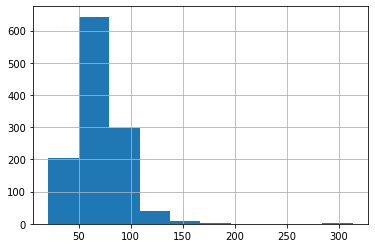

In [100]:
print(training.LotFrontage.value_counts())
print(training.LotFrontage.hist())

<AxesSubplot:>

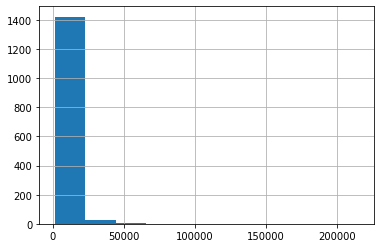

In [101]:
training.LotArea.hist()

In [102]:
print(training.Street.value_counts())
training['Street_Pave'] = training.Street.apply(lambda x: 1 if x == 'Pave' else 0)
training.Street_Pave.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64


1    1454
0       6
Name: Street_Pave, dtype: int64

In [103]:
print(training.Alley.value_counts())
training.Alley = training.Alley.apply(lambda x: 1 if type(x) == str else 0)
training.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64


0    1369
1      91
Name: Alley, dtype: int64

In [104]:
training.LotShape.value_counts()
lotshape_others = ['IR2', 'IR3']
training.LotShape = training.LotShape.apply(lambda x: 1 if x == "Reg" else 0)
training.LotShape.value_counts()

1    925
0    535
Name: LotShape, dtype: int64

In [105]:
training.LandContour.value_counts()
training['LandContour_Flat'] = training.LandContour.apply(lambda x: 1 if x == 'Lvl' else 0)
training.LandContour_Flat.value_counts()

1    1311
0     149
Name: LandContour_Flat, dtype: int64

In [106]:
training.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [107]:
training.LotConfig.value_counts()
training.LotConfig = training.LotConfig.apply(lambda x: 'Other' if x == 'FR2' or x == 'FR3' else x)
training.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
Other        51
Name: LotConfig, dtype: int64

In [108]:
training.LandSlope.value_counts()
training['LandSlope_Gentle'] = training.LandSlope.apply(lambda x: 1 if x == 'Gtl' else 0)
training.LandSlope_Gentle.value_counts()

1    1382
0      78
Name: LandSlope_Gentle, dtype: int64

In [109]:
training.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [110]:
training.Condition1.value_counts()
pos_condition = ['Feedr', 'Artery', 'PosN', 'PosA']
rr_condition = ['RRAe', 'RRAn', 'RRNn', 'RRNe']
training.Condition1 = training.Condition1.apply(lambda x: 'Pos' if x in pos_condition else x)
training.Condition1 = training.Condition1.apply(lambda x: 'RR' if x in rr_condition else x)
training.Condition1.value_counts()

Norm    1260
Pos      156
RR        44
Name: Condition1, dtype: int64

In [111]:
training.Condition2.value_counts()
pos_condition = ['Feedr', 'Artery', 'PosN', 'PosA']
rr_condition = ['RRAe', 'RRAn', 'RRNn', 'RRNe']
training.Condition2 = training.Condition2.apply(lambda x: 0 if x == 'Norm' else 1)
training.Condition2.value_counts()

0    1445
1      15
Name: Condition2, dtype: int64

In [112]:
training.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [113]:
training.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [114]:
training.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [115]:
training.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64


<AxesSubplot:>

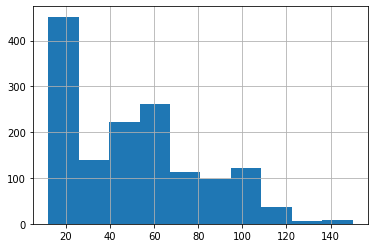

In [116]:
print(training.YearBuilt.value_counts())

date = datetime.date.today()
year = int(date.strftime("%Y"))

training['Year_Old'] = training.YearBuilt.apply(lambda x: year - x)
training.Year_Old.value_counts()
training.Year_Old.hist()

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64
72    178
16     97
15     76
17     73
18     62
     ... 
12      6
36      5
70      5
39      5
71      4
Name: Remod_Age, Length: 61, dtype: int64


<AxesSubplot:>

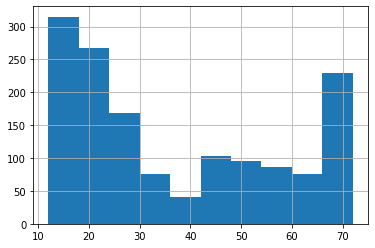

In [117]:
print(training.YearRemodAdd.value_counts())
training['Remod_Age'] = training.YearRemodAdd.apply(lambda x: year - x)
print(training.Remod_Age.value_counts())
training.Remod_Age.hist()

In [118]:
training.RoofStyle.value_counts()
training['Gable_Roof'] = training.RoofStyle.apply(lambda x: 1 if x == 'Gable' else 0)
training.Gable_Roof.value_counts()

1    1141
0     319
Name: Gable_Roof, dtype: int64

In [119]:
training.RoofMatl.value_counts()
training['Comp_Roof'] = training.RoofMatl.apply(lambda x: 1 if x == 'CompShg' else 0)
training.Comp_Roof.value_counts()

1    1434
0      26
Name: Comp_Roof, dtype: int64

In [120]:
training.Exterior1st.value_counts()
ext1_others = ['WdShing','Stucco', 'AsbShng', 'BrkComm', 'Stone', 'AsphShn', 'ImStucc', 'CBlock']
training.Exterior1st = training.Exterior1st.apply(lambda x: 'Other' if x in ext1_others else x)
training.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
Other       78
CemntBd     61
BrkFace     50
Name: Exterior1st, dtype: int64

In [121]:
training.Exterior2nd.value_counts()
ext2 = ['BrkFace', 'Other', 'Brk Cmn']
ext2_others = ext1_others + ext2
training.Exterior2nd = training.Exterior2nd.apply(lambda x: 'Other' if x in ext2_others else x)
training.Exterior2nd.value_counts()


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
Other       98
CmentBd     60
Wd Shng     38
Name: Exterior2nd, dtype: int64

In [122]:
print(training.MasVnrType.value_counts())
print(training.MasVnrType.isnull().sum().sum())
training.MasVnrType.fillna('None', inplace=True)
print(training.MasVnrType.value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
8
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [123]:
training.MasVnrArea.value_counts()
print(training.MasVnrArea.isnull().sum().sum())
training.MasVnrArea.fillna(0, inplace=True)
print(training.MasVnrArea.isnull().sum().sum())

8
0


In [124]:
#Ex	Excellent (100+ inches)	
#Gd	Good (90-99 inches)
#TA	Typical (80-89 inches)
#Fa	Fair (70-79 inches)
#Po	Poor (<70 inches
#NA	No Basement

training.ExterQual.value_counts()
ex_po = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ex_po_ord = OrdinalEncoder(categories=[ex_po])
training.ExterQual = ex_po_ord.fit_transform(training[['ExterQual']])


training.ExterQual.value_counts()


3.0    906
4.0    488
5.0     52
2.0     14
Name: ExterQual, dtype: int64

In [125]:
training.ExterCond.value_counts()
training.ExterCond = ex_po_ord.fit_transform(training[['ExterCond']])
training.ExterCond.value_counts()

3.0    1282
4.0     146
2.0      28
5.0       3
1.0       1
Name: ExterCond, dtype: int64

In [126]:
training.Foundation.value_counts()
found_others = ['Slab', 'Stone', 'Wood']

training.Foundation = training.Foundation.apply(lambda x: 'Other' if x in found_others else x)
training.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Other      33
Name: Foundation, dtype: int64

In [127]:
training.BsmtQual.value_counts()
training.BsmtQual.fillna('NA', inplace=True)
training.BsmtQual.value_counts()

training.BsmtQual = ex_po_ord.fit_transform(training[['BsmtQual']])
training.BsmtQual.value_counts()


3.0    649
4.0    618
5.0    121
0.0     37
2.0     35
Name: BsmtQual, dtype: int64

In [128]:
print(training.BsmtCond.value_counts())
training.BsmtCond.fillna('NA', inplace=True)
print(training.BsmtCond.value_counts())

training.BsmtCond = ex_po_ord.fit_transform(training[['BsmtCond']])
training.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64


3.0    1311
4.0      65
2.0      45
0.0      37
1.0       2
Name: BsmtCond, dtype: int64

In [129]:
print(training.BsmtExposure.value_counts())
training.BsmtExposure.fillna('NA', inplace=True)
print(training.BsmtExposure.value_counts())

bs_ex = ['NA', 'No', 'Mn', 'Av', 'Gd']
bs_ex_ord = OrdinalEncoder(categories=[bs_ex])
training.BsmtExposure = bs_ex_ord.fit_transform(training[['BsmtExposure']])
training.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64


1.0    953
3.0    221
4.0    134
2.0    114
0.0     38
Name: BsmtExposure, dtype: int64

In [130]:
print(training.BsmtFinType1.value_counts())
training.BsmtFinType1.fillna('NA', inplace=True)
print(training.BsmtFinType1.value_counts())

fin_type = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
fin_type_enc = OrdinalEncoder(categories=[fin_type])
training.BsmtFinType1 = fin_type_enc.fit_transform(training[['BsmtFinType1']])
training.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64


1.0    430
6.0    418
5.0    220
4.0    148
3.0    133
2.0     74
0.0     37
Name: BsmtFinType1, dtype: int64

<AxesSubplot:ylabel='BsmtFinSF1'>

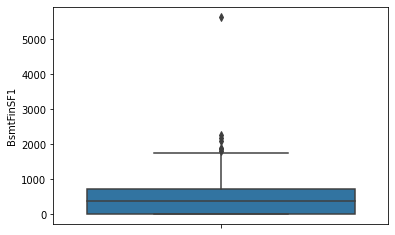

In [131]:
sns.boxplot(data=training, y='BsmtFinSF1')

In [132]:
print(training.BsmtFinType2.value_counts())
training.BsmtFinType2.fillna('NA', inplace=True)
print(training.BsmtFinType2.value_counts())

training.BsmtFinType2 = fin_type_enc.fit_transform(training[['BsmtFinType2']])
training.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


1.0    1256
3.0      54
2.0      46
0.0      38
4.0      33
5.0      19
6.0      14
Name: BsmtFinType2, dtype: int64

<AxesSubplot:ylabel='BsmtFinSF2'>

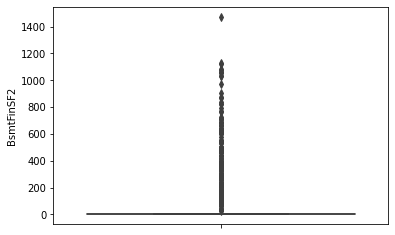

In [133]:
sns.boxplot(y = training.BsmtFinSF2)

<AxesSubplot:ylabel='BsmtUnfSF'>

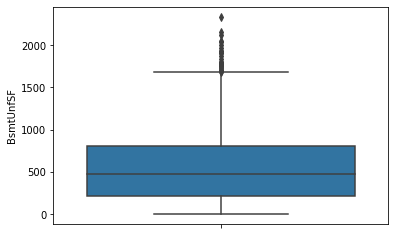

In [134]:
sns.boxplot(y=training.BsmtUnfSF)

<AxesSubplot:ylabel='TotalBsmtSF'>

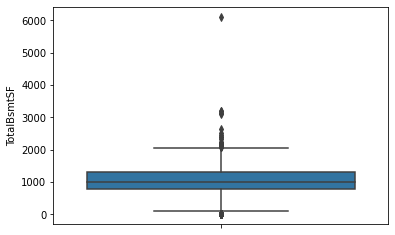

In [135]:
sns.boxplot(y=training.TotalBsmtSF)

In [136]:
training.Heating.value_counts()
gas = ['GasA', 'GasW']

training['Gas'] = training.Heating.apply(lambda x: 1 if x in gas else 0)
training.Gas.value_counts()

1    1446
0      14
Name: Gas, dtype: int64

In [137]:
training.HeatingQC.value_counts()
training.HeatingQC = ex_po_ord.fit_transform(training[['HeatingQC']])
training.HeatingQC.value_counts()

5.0    741
3.0    428
4.0    241
2.0     49
1.0      1
Name: HeatingQC, dtype: int64

In [138]:
training.CentralAir.value_counts()
training.CentralAir = training.CentralAir.apply(lambda x: 1 if x =='Y' else 0)
training.CentralAir.value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

<AxesSubplot:ylabel='2ndFlrSF'>

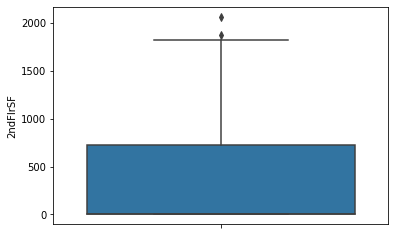

In [139]:
sns.boxplot(y=training['2ndFlrSF'])

In [140]:
print(training.Electrical.value_counts())
print(training.Electrical.isnull().sum().sum())
training.Electrical.fillna('SBrkr', inplace=True)

training.Electrical = training.Electrical.apply(lambda x: 1 if x == 'SBrkr' else 0)
training.Electrical.value_counts()


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
1


1    1335
0     125
Name: Electrical, dtype: int64

<AxesSubplot:ylabel='LowQualFinSF'>

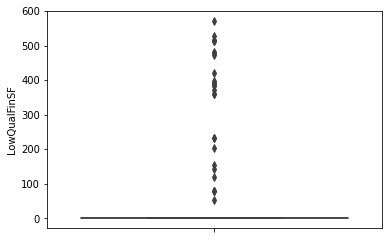

In [141]:
sns.boxplot(y=training.LowQualFinSF)

<AxesSubplot:ylabel='GrLivArea'>

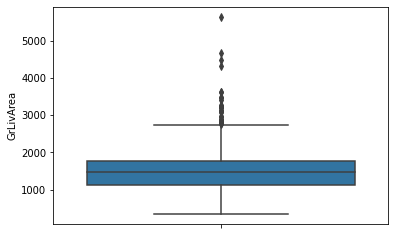

In [142]:
sns.boxplot(y=training.GrLivArea)

In [143]:
training.BsmtFullBath.value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [144]:
training.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [145]:
training.FullBath.value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [146]:
training.HalfBath.value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [147]:
training.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [148]:
training.KitchenAbvGr.value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [149]:
print(training.KitchenQual.value_counts())
training.KitchenQual = ex_po_ord.fit_transform(training[['KitchenQual']])
training.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


3.0    735
4.0    586
5.0    100
2.0     39
Name: KitchenQual, dtype: int64

In [150]:
#       Typ	Typical Functionality
#       Min1	Minor Deductions 1
#       Min2	Minor Deductions 2
#       Mod	Moderate Deductions
#       Maj1	Major Deductions 1
#       Maj2	Major Deductions 2
#       Sev	Severely Damaged
#       Sal	Salvage only
print(training.Functional.value_counts())
func = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
func_ord = OrdinalEncoder(categories=[func])

training.Functional = func_ord.fit_transform(training[['Functional']])
training.Functional.value_counts()


Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


7.0    1360
5.0      34
6.0      31
4.0      15
3.0      14
2.0       5
1.0       1
Name: Functional, dtype: int64

In [151]:
training.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [152]:
print(training.FireplaceQu.value_counts())
training.FireplaceQu.fillna('NA', inplace=True)
print(training.FireplaceQu.value_counts())

training.FireplaceQu = ex_po_ord.fit_transform(training[['FireplaceQu']])
training.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


0.0    690
4.0    380
3.0    313
2.0     33
5.0     24
1.0     20
Name: FireplaceQu, dtype: int64

In [153]:
training.GarageType.value_counts()
training.GarageType.fillna('None', inplace=True)
training.GarageType.value_counts()
garage_others = ['Basement', 'CarPort', '2Types', 'Basment']

training.GarageType = training.GarageType.apply(lambda x: 'Other' if x in garage_others else x)
training.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
None        81
Other       34
Name: GarageType, dtype: int64

In [154]:
training.GarageFinish.value_counts()
training.GarageFinish.fillna('None', inplace=True)
training.GarageFinish.value_counts()

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64

In [155]:
training.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [156]:
training.GarageQual.value_counts()
training.GarageQual.fillna('NA', inplace=True)
training.GarageQual = ex_po_ord.fit_transform(training[['GarageQual']])
training.GarageQual.value_counts()

3.0    1311
0.0      81
2.0      48
4.0      14
5.0       3
1.0       3
Name: GarageQual, dtype: int64

In [157]:
training.GarageCond.value_counts()
training.GarageCond.fillna('NA', inplace=True)
training.GarageCond = ex_po_ord.fit_transform(training[['GarageCond']])
training.GarageCond.value_counts()

3.0    1326
0.0      81
2.0      35
4.0       9
1.0       7
5.0       2
Name: GarageCond, dtype: int64

In [158]:
training.PavedDrive.value_counts()
pave = ['N', 'P', 'Y']
pave_ord = OrdinalEncoder(categories=[pave])

training.PavedDrive = pave_ord.fit_transform(training[['PavedDrive']])
training.PavedDrive.value_counts()

2.0    1340
0.0      90
1.0      30
Name: PavedDrive, dtype: int64

<AxesSubplot:ylabel='WoodDeckSF'>

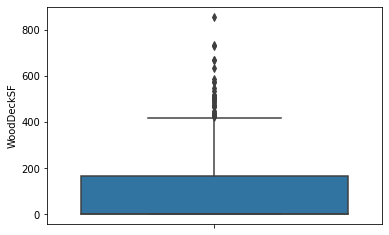

In [159]:
sns.boxplot(y=training.WoodDeckSF)

<AxesSubplot:ylabel='OpenPorchSF'>

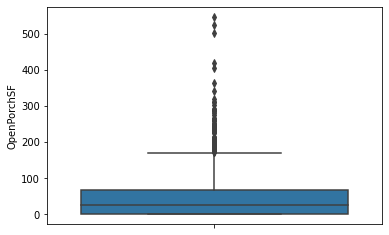

In [160]:
sns.boxplot(y=training.OpenPorchSF)

<AxesSubplot:ylabel='EnclosedPorch'>

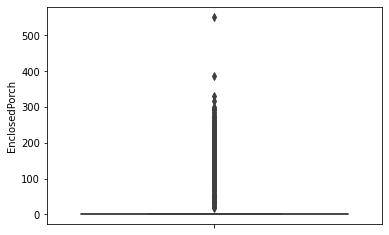

In [161]:
sns.boxplot(y=training.EnclosedPorch)

<AxesSubplot:ylabel='3SsnPorch'>

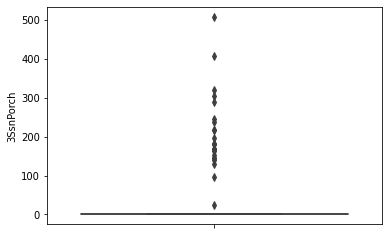

In [162]:
sns.boxplot(y=training['3SsnPorch'])

<AxesSubplot:ylabel='ScreenPorch'>

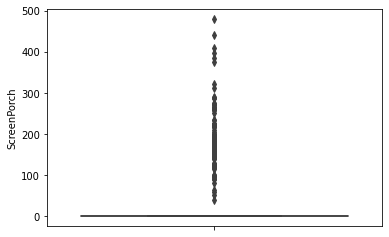

In [163]:
sns.boxplot(y=training.ScreenPorch)

<AxesSubplot:ylabel='PoolArea'>

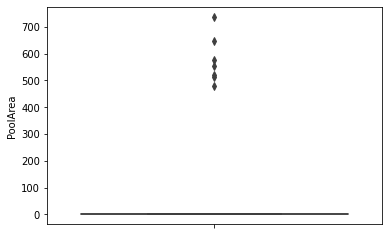

In [164]:
sns.boxplot(y=training.PoolArea)

In [165]:
training.PoolQC.value_counts()
training.PoolQC.fillna('NA', inplace=True)
training.PoolQC = ex_po_ord.fit_transform(training[['PoolQC']])
training.PoolQC.value_counts()

0.0    1453
4.0       3
5.0       2
2.0       2
Name: PoolQC, dtype: int64

In [166]:
#       GdPrv	Good Privacy
#       MnPrv	Minimum Privacy
#       GdWo	Good Wood
#       MnWw	Minimum Wood/Wire
#       NA	No Fence
training.Fence.value_counts()
fence = ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
fence_ord = OrdinalEncoder(categories=[fence])

training.Fence.fillna('NA', inplace=True)
training.Fence = fence_ord.fit_transform(training[['Fence']])
training.Fence.value_counts()


0.0    1179
3.0     157
4.0      59
2.0      54
1.0      11
Name: Fence, dtype: int64

In [167]:
training.MiscFeature.value_counts()
training.MiscFeature.fillna("NA", inplace=True)
training.MiscFeature = training.MiscFeature.apply(lambda x: 0 if x == 'NA' else 1)
training.MiscFeature.value_counts()

0    1406
1      54
Name: MiscFeature, dtype: int64

<AxesSubplot:ylabel='MiscVal'>

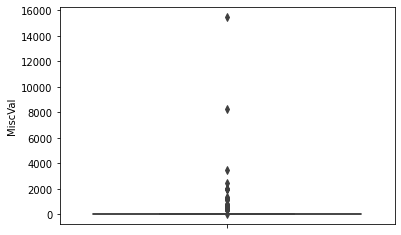

In [168]:
sns.boxplot(y=training.MiscVal)

In [169]:
training.MoSold.value_counts()


6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [170]:
training.YrSold.value_counts()
training['SaleAge'] = training.YrSold.apply(lambda x: year - x)
training.SaleAge.value_counts()

13    338
15    329
16    314
14    304
12    175
Name: SaleAge, dtype: int64

In [171]:
training.SaleType.value_counts()
sale_common = ['WD', 'New', 'COD']
training.SaleType = training.SaleType.apply(lambda x: x if x in sale_common else 'Other')
training.SaleType.value_counts()

WD       1267
New       122
COD        43
Other      28
Name: SaleType, dtype: int64

In [172]:
training.SaleCondition.value_counts()
cond_others = ['Family', 'Alloca', 'AdjLand']
training.SaleCondition = training.SaleCondition.apply(lambda x: 'Other' if x in cond_others else x)
training.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Other        36
Name: SaleCondition, dtype: int64

# Train Test Split

Before I did the test train split, I applied the transformations to the DF that included all the data. I also ended up adding some to the null value section that occured in the test data and not the train data.

Due to the large amount of 0s in the data, I did not end up normalizing it. Instead, I used models that would deal with it better.

In [173]:
# Filling null values
all_data.MasVnrType.fillna('None', inplace=True)
all_data.MasVnrArea.fillna(0, inplace=True)
all_data.BsmtCond.fillna('NA', inplace=True)
all_data.BsmtQual.fillna('NA', inplace=True)
all_data.BsmtExposure.fillna('NA', inplace=True)
all_data.BsmtFinType1.fillna('NA', inplace=True)
all_data.BsmtFinSF1.fillna(0, inplace=True)
all_data.BsmtFinType2.fillna('NA', inplace=True)
all_data.BsmtFinSF2.fillna(0, inplace=True)
all_data.BsmtUnfSF.fillna(0, inplace=True)
all_data.TotalBsmtSF.fillna(0, inplace=True)
all_data.BsmtFullBath.fillna(0, inplace=True)
all_data.BsmtHalfBath.fillna(0, inplace=True)
all_data.Electrical.fillna('SBrkr', inplace=True)
all_data.GarageType.fillna('None', inplace=True)
all_data.GarageFinish.fillna('None', inplace=True)
all_data.GarageQual.fillna('NA', inplace=True)
all_data.GarageCond.fillna('NA', inplace=True)
all_data.GarageCars.fillna(0, inplace=True)
all_data.PoolQC.fillna('NA', inplace=True)
all_data.Fence.fillna('NA', inplace=True)
all_data.MiscFeature.fillna("NA", inplace=True)
all_data.KitchenQual.fillna('TA', inplace=True)
all_data.Functional.fillna('Typ', inplace=True)
all_data.FireplaceQu.fillna('NA', inplace=True)
all_data.LotFrontage.fillna(training.LotFrontage.median(), inplace=True)
all_data.Exterior1st.fillna('Other', inplace=True)
all_data.Exterior2nd.fillna('Other', inplace=True)


# Transforming columns
all_data.MSSubClass = all_data.MSSubClass.apply(lambda x: str('other') if x in mssub_others else str(x))
all_data.MSZoning = all_data.MSZoning.apply(lambda x: 1 if x == 'RL' else 0)
all_data.LotShape = all_data.LotShape.apply(lambda x: 1 if x == "Reg" else 0)
all_data.Alley = all_data.Alley.apply(lambda x: 1 if type(x) == str else 0)
all_data.LotConfig = all_data.LotConfig.apply(lambda x: 'Other' if x == 'FR2' or x == 'FR3' else x)
all_data.Condition1 = all_data.Condition1.apply(lambda x: 'Pos' if x in pos_condition else x)
all_data.Condition1 = all_data.Condition1.apply(lambda x: 'RR' if x in rr_condition else x)
all_data.Condition2 = all_data.Condition2.apply(lambda x: 0 if x == 'Norm' else 1)
all_data.Exterior1st = all_data.Exterior1st.apply(lambda x: 'Other' if x in ext1_others else x)
all_data.Exterior2nd = all_data.Exterior2nd.apply(lambda x: 'Other' if x in ext2_others else x)
all_data.Foundation = all_data.Foundation.apply(lambda x: 'Other' if x in found_others else x)
all_data.CentralAir = all_data.CentralAir.apply(lambda x: 1 if x =='Y' else 0)
all_data.Electrical = all_data.Electrical.apply(lambda x: 1 if x == 'SBrkr' else 0)
all_data.GarageType = all_data.GarageType.apply(lambda x: 'Other' if x in garage_others else x)
all_data.MiscFeature = all_data.MiscFeature.apply(lambda x: 0 if x == 'NA' else 1)
all_data.SaleType = all_data.SaleType.apply(lambda x: x if x in sale_common else 'Other')
all_data.PavedDrive = all_data.PavedDrive.apply(lambda x: 1 if x == 'Y' else 0)



# Changing columns to Ordinal
all_data.ExterQual = ex_po_ord.fit_transform(all_data[['ExterQual']])
all_data.ExterCond = ex_po_ord.fit_transform(all_data[['ExterCond']])
all_data.BsmtQual = ex_po_ord.fit_transform(all_data[['BsmtQual']])
all_data.BsmtCond = ex_po_ord.fit_transform(all_data[['BsmtCond']])
all_data.BsmtExposure = bs_ex_ord.fit_transform(all_data[['BsmtExposure']])
all_data.BsmtFinType1 = fin_type_enc.fit_transform(all_data[['BsmtFinType1']])
all_data.BsmtFinType2 = fin_type_enc.fit_transform(all_data[['BsmtFinType2']])
all_data.HeatingQC = ex_po_ord.fit_transform(all_data[['HeatingQC']])
all_data.KitchenQual = ex_po_ord.fit_transform(all_data[['KitchenQual']])
all_data.Functional = func_ord.fit_transform(all_data[['Functional']])
all_data.FireplaceQu = ex_po_ord.fit_transform(all_data[['FireplaceQu']])
all_data.GarageQual = ex_po_ord.fit_transform(all_data[['GarageQual']])
all_data.GarageCond = ex_po_ord.fit_transform(all_data[['GarageCond']])
all_data.PoolQC = ex_po_ord.fit_transform(all_data[['PoolQC']])
all_data.Fence = fence_ord.fit_transform(all_data[['Fence']])


# Adding new columns with more descriptive names
all_data['Street_Pave'] = all_data.Street.apply(lambda x: 1 if x == 'Pave' else 0)
all_data['LandContour_Flat'] = all_data.LandContour.apply(lambda x: 1 if x == 'Lvl' else 0)
all_data['LandSlope_Gentle'] = all_data.LandSlope.apply(lambda x: 1 if x == 'Gtl' else 0)
all_data['Year_Old'] = all_data.YearBuilt.apply(lambda x: year - x)
all_data['Year_Old'] = all_data.YearBuilt.apply(lambda x: year - x)
all_data['Gable_Roof'] = all_data.RoofStyle.apply(lambda x: 1 if x == 'Gable' else 0)
all_data['Comp_Roof'] = all_data.RoofMatl.apply(lambda x: 1 if x == 'CompShg' else 0)
all_data['Gas'] = all_data.Heating.apply(lambda x: 1 if x in gas else 0)
all_data['SaleAge'] = all_data.YrSold.apply(lambda x: year - x)

# Dropping columns that were replaced above
all_data.drop(['MiscFeature', 'Fence', 'PoolQC', 'Alley', 'YrSold', 'Heating', 'RoofMatl', 'RoofStyle', 'YearRemodAdd', 'YearBuilt', 'LandSlope', 
               'LandContour', 'Street', 'Utilities'], axis=1, inplace=True)

# Dropping highly correlated columns
all_data.drop(columns=corr_array, inplace=True)






In [174]:
len(all_data.columns)

71

In [175]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   object 
 2   MSZoning          1460 non-null   int64  
 3   LotFrontage       1460 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   LotShape          1460 non-null   int64  
 6   LotConfig         1460 non-null   object 
 7   Neighborhood      1460 non-null   object 
 8   Condition1        1460 non-null   object 
 9   Condition2        1460 non-null   int64  
 10  BldgType          1460 non-null   object 
 11  HouseStyle        1460 non-null   object 
 12  OverallQual       1460 non-null   int64  
 13  OverallCond       1460 non-null   int64  
 14  Exterior1st       1460 non-null   object 
 15  Exterior2nd       1460 non-null   object 
 16  MasVnrType        1460 non-null   object 


In [176]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

ohe_columns = ['Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'MSSubClass', 'Exterior1st', 'Exterior2nd', 
               'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish', 'SaleType', 'LotConfig', 'SaleCondition']

df_ohe = all_data[ohe_columns]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

temp = pd.DataFrame(enc.fit_transform(df_ohe))

temp.columns = enc.get_feature_names(ohe_columns)
all_data.drop(ohe_columns, inplace=True, axis=1)
all_data = pd.concat([all_data, temp], axis=1)

all_data.head(3)
            

,Id,MSZoning,LotFrontage,LotArea,LotShape,Condition2,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Street_Pave,LandContour_Flat,LandSlope_Gentle,Year_Old,Gable_Roof,Comp_Roof,Gas,SaleAge,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_Pos,Condition1_RR,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MSSubClass_120,MSSubClass_160,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSSubClass_other,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleType_COD,SaleType_New,SaleType_Other,SaleType_WD,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Other,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,1,65.0,8450,1,0,7,5,196.0,4.0,3.0,4.0,3.0,1.0,6.0,706,1.0,0,150,856,5.0,1,1,854,0,1710,1,0,2,1,3,1,4.0,7.0,0,0.0,2,3.0,3.0,1,0,61,0,0,0,0,0,2,208500,1,1,1,19,1,1,1,14,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,80.0,9600,1,0,6,8,0.0,3.0,3.0,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,5.0,1,1,0,0,1262,0,1,2,0,3,1,3.0,7.0,1,3.0,2,3.0,3.0,1,298,0,0,0,0,0,0,5,181500,1,1,1,46,1,1,1,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,68.0,11250,0,0,7,5,162.0,4.0,3.0,4.0,3.0,2.0,6.0,486,1.0,0,434,920,5.0,1,1,866,0,1786,1,0,2,1,3,1,4.0,7.0,1,3.0,2,3.0,3.0,1,0,42,0,0,0,0,0,9,223500,1,1,1,21,1,1,1,14,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.

In [177]:
all_data.head(3)

,Id,MSZoning,LotFrontage,LotArea,LotShape,Condition2,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Street_Pave,LandContour_Flat,LandSlope_Gentle,Year_Old,Gable_Roof,Comp_Roof,Gas,SaleAge,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_Pos,Condition1_RR,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MSSubClass_120,MSSubClass_160,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSSubClass_other,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleType_COD,SaleType_New,SaleType_Other,SaleType_WD,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Other,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,1,65.0,8450,1,0,7,5,196.0,4.0,3.0,4.0,3.0,1.0,6.0,706,1.0,0,150,856,5.0,1,1,854,0,1710,1,0,2,1,3,1,4.0,7.0,0,0.0,2,3.0,3.0,1,0,61,0,0,0,0,0,2,208500,1,1,1,19,1,1,1,14,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,80.0,9600,1,0,6,8,0.0,3.0,3.0,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,5.0,1,1,0,0,1262,0,1,2,0,3,1,3.0,7.0,1,3.0,2,3.0,3.0,1,298,0,0,0,0,0,0,5,181500,1,1,1,46,1,1,1,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,68.0,11250,0,0,7,5,162.0,4.0,3.0,4.0,3.0,2.0,6.0,486,1.0,0,434,920,5.0,1,1,866,0,1786,1,0,2,1,3,1,4.0,7.0,1,3.0,2,3.0,3.0,1,0,42,0,0,0,0,0,9,223500,1,1,1,21,1,1,1,14,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.

In [178]:
# Train Test Split
from sklearn.model_selection import train_test_split

y = all_data['SalePrice']
X = all_data.copy()
X = X.drop('SalePrice', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=1)

# Modeling

In [179]:
xgb = XGBRegressor(random_state=0)
cv = cross_val_score(xgb, X_train, y_train, cv=5)
cv.mean()

0.842876803538666

In [180]:
rf = RandomForestRegressor(random_state=0)
cv = cross_val_score(rf, X_train, y_train, cv=5)
cv.mean()
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

# Results


In [181]:
import pickle

data = {'model': rf, 'ex_po_ord': ex_po_ord, 'bs_ex_ord': bs_ex_ord, 'fin_type_enc': fin_type_enc, 'func_ord': func_ord, 'pav_ord': pave_ord, 'fence_ord': fence_ord, 'cols': X_train.columns}

with open('model.pickle', 'wb') as file:
    pickle.dump(data, file)

In [182]:
import joblib

rf_model = open('rf_model', 'wb')
joblib.dump(rf,rf_model)
rf_model.close

<function BufferedWriter.close>